In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from os import listdir
import pandas as pd


In [2]:
#!pip install pillow

In [3]:
#!pip install glob2

In [4]:
import PIL
from PIL import Image
from numpy import asarray
import glob

In [5]:
normalchest_image_list=[]
normalchest_labels=[]
for filename in glob.glob('C:/Users/skibocha/Downloads/TB_Chest_Radiography_Database/normal/*.png'):
    im=Image.open(filename)
    im=im.resize((150,150))
    my_arr=asarray(im)
    normalchest_image_list.append(my_arr)
    normalchest_labels.append(0)
    
    


In [6]:
tbchest_image_list=[]
tbchest_labels=[]
for filename in glob.glob('C:/Users/skibocha/Downloads/TB_Chest_Radiography_Database/Tuberculosis/*.png'):
    im=Image.open(filename)
    im=im.resize((150,150))
    my_arr=asarray(im)
    tbchest_image_list.append(my_arr)
    normalchest_labels.append(1)
    
   

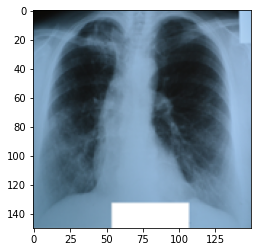

In [7]:
image=tbchest_image_list[0]
numpydata=asarray(image)
plt.imshow(numpydata)

In [8]:
len(normalchest_image_list)
#len(normalchest_labels)

3500

In [9]:
len(tbchest_labels)


0

In [10]:
len(normalchest_labels)

4200

In [11]:
len(tbchest_image_list)

700

In [12]:
type(normalchest_image_list)
type(normalchest_labels)

list

In [13]:
features=normalchest_image_list + tbchest_image_list
labels=normalchest_labels+tbchest_labels

In [14]:

#labels=normalchest_labels+tbchest_labels
##=tbchest_image_list[0].tolist()

In [15]:
#tbchest_image_list1=[]
#for i in range (0, 20):
   # li=tbchest_image_list[i].tolist()
    #tbchest_image_list1.append(li)
    
    

In [16]:
#normalchest_image_list1=[]
#or i in range(0,20):
    #li=normalchest_image_list[i].tolist()
   # normalchest_image_list1.append(li)

In [17]:
#features1=tbchest_image_list1+normalchest_image_list1
#labels1=normalchest_labels+tbchest_labels

In [18]:
#f=np.asarray(features)

# Image preprocessing
 conversion to grayscale
 
 scalling the values between 0 and 1

# Grayscale

In [19]:
#!pip install colour

In [20]:

#pip install -U scikit-image

In [21]:
from skimage import io
from skimage.color import rgb2gray
grayscale=[]
for i in range(0,len(features)):
    instance=features[0]
    reshaped=rgb2gray(instance)
    grayscale.append(reshaped)

In [22]:
features[0].shape

(150, 150, 3)

In [23]:
grayscale[0].shape

(150, 150)

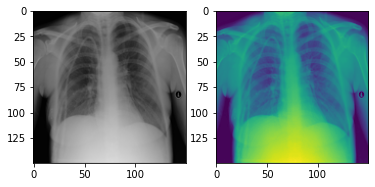

In [24]:
fig,axes=plt.subplots(1,2)
axes[0].imshow(features[0])
axes[1].imshow(grayscale[1])

# Standardizing

In [25]:
features_std=[]
for i in range(0,len(grayscale)):
    instance=grayscale[i]
    scaled=grayscale[i]/255.
    features_std.append(scaled)

In [26]:
headers =[]
for i in range(0,22500):
    header = 'Pixel{}'.format(i)
    headers.append(header)

In [27]:
headers[1]

'Pixel1'

In [28]:
sample = features_std[0].ravel()
print(sample.shape)
sample

(22500,)


array([4.61361015e-05, 4.61361015e-05, 4.61361015e-05, ...,
       1.07650903e-04, 1.07650903e-04, 1.07650903e-04])

In [29]:
df=pd.DataFrame(columns=headers)
df.head()

,Pixel0,Pixel1,Pixel2,Pixel3,Pixel4,Pixel5,Pixel6,Pixel7,Pixel8,Pixel9,...,Pixel22490,Pixel22491,Pixel22492,Pixel22493,Pixel22494,Pixel22495,Pixel22496,Pixel22497,Pixel22498,Pixel22499


In [30]:
for i in range(0, len(features)):
    sample = features_std[i].ravel()
    df.loc[i,headers] =sample


# TRAIN-TEST SPLIT

In [58]:
df.head()

,Pixel0,Pixel1,Pixel2,Pixel3,Pixel4,Pixel5,Pixel6,Pixel7,Pixel8,Pixel9,...,Pixel22490,Pixel22491,Pixel22492,Pixel22493,Pixel22494,Pixel22495,Pixel22496,Pixel22497,Pixel22498,Pixel22499
0,0.000046,0.000046,0.000046,0.000046,0.000046,0.000046,0.000046,0.000046,0.000046,0.000046,...,0.000092,0.000108,0.000123,0.000108,0.000092,0.000108,0.000108,0.000108,0.000108,0.000108
1,0.000046,0.000046,0.000046,0.000046,0.000046,0.000046,0.000046,0.000046,0.000046,0.000046,...,0.000092,0.000108,0.000123,0.000108,0.000092,0.000108,0.000108,0.000108,0.000108,0.000108
2,0.000046,0.000046,0.000046,0.000046,0.000046,0.000046,0.000046,0.000046,0.000046,0.000046,...,0.000092,0.000108,0.000123,0.000108,0.000092,0.000108,0.000108,0.000108,0.000108,0.000108
3,0.000046,0.000046,0.000046,0.000046,0.000046,0.000046,0.000046,0.000046,0.000046,0.000046,...,0.000092,0.000108,0.000123,0.000108,0.000092,0.000108,0.000108,0.000108,0.000108,0.000108
4,0.000046,0.000046,0.000046,0.000046,0.000046,0.000046,0.000046,0.000046,0.000046,0.000046,...,0.000092,0.000108,0.000123,0.000108,0.000092,0.000108,0.000108,0.000108,0.000108,0.000108


In [59]:
sample

array([4.61361015e-05, 4.61361015e-05, 4.61361015e-05, ...,
       1.07650903e-04, 1.07650903e-04, 1.07650903e-04])

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
len(features)

4200

In [62]:
len(labels)

4200

In [63]:
len(df)

4200

In [64]:
x_train, x_test, y_train, y_test = train_test_split(df, labels, test_size = 0.2, random_state=0)

In [65]:
len(x_train)

3360

In [66]:
len(x_test)

840

In [67]:
y_test

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,


In [68]:
x_train

,Pixel0,Pixel1,Pixel2,Pixel3,Pixel4,Pixel5,Pixel6,Pixel7,Pixel8,Pixel9,...,Pixel22490,Pixel22491,Pixel22492,Pixel22493,Pixel22494,Pixel22495,Pixel22496,Pixel22497,Pixel22498,Pixel22499
1742,0.000046,0.000046,0.000046,0.000046,0.000046,0.000046,0.000046,0.000046,0.000046,0.000046,...,0.000092,0.000108,0.000123,0.000108,0.000092,0.000108,0.000108,0.000108,0.000108,0.000108
3144,0.000046,0.000046,0.000046,0.000046,0.000046,0.000046,0.000046,0.000046,0.000046,0.000046,...,0.000092,0.000108,0.000123,0.000108,0.000092,0.000108,0.000108,0.000108,0.000108,0.000108
3374,0.000046,0.000046,0.000046,0.000046,0.000046,0.000046,0.000046,0.000046,0.000046,0.000046,...,0.000092,0.000108,0.000123,0.000108,0.000092,0.000108,0.000108,0.000108,0.000108,0.000108
1357,0.000046,0.000046,0.000046,0.000046,0.000046,0.000046,0.000046,0.000046,0.000046,0.000046,...,0.000092,0.000108,0.000123,0.000108,0.000092,0.000108,0.000108,0.000108,0.000108,0.000108
1021,0.000046,0.000046,0.000046,0.000046,0.000046,0.000046,0.000046,0.000046,0.000046,0.000046,...,0.000092,0.000108,0.000123,0.000108,0.000092,0.000108,0.000108,0.000108,0.000108,0.000108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,0.000046,0.000046,0.000046,0.000046,0.000046,0.000046,0.000046,0.000046,0.000046,0.000046,...,0.000092,0.000108,0.000123,0.000108,0.000092,0.000108,0.000108,0.000108,0.000108,0.000108
3264,0.000046,0.000046,0.000046,0.000046,0.000046,0.000046,0.000046,0.000046,0.000046,0.000046,...,0.000092,0.000108,0.000123,0.000108,0.000092,0.000108,0.000108,0.000108,0.000108,0.000108
1653,0.000046,0.000046,0.000046,0.000046,0.000046,0.000046,0.000046,0.000046,0.000046,0.000046,...,0.000092,0.000108,0.000123,0.000108,0.000092,0.000108,0.000108,0.000108,0.000108,0.000108
2607,0.000046,0.000046,0.000046,0.000046,0.000046,0.000046,0.000046,0.000046,0.000046,0.000046,...,0.000092,0.000108,0.000123,0.000108,0.000092,0.000108,0.000108,0.000108,0.000108,0.000108


# MODEL TRAINING

# Decison tree


In [69]:
from sklearn import tree
clftree=tree.DecisionTreeClassifier(max_depth=3)

In [70]:
clftree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

# model Performance

In [71]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [72]:
accuracy_score(y_train, clftree.predict(x_train))

0.8383928571428572

In [73]:
accuracy_score(y_test, clftree.predict(x_test))

0.8130952380952381

# Random Forest

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [75]:
rf_clf=RandomForestClassifier(n_estimators=100,n_jobs=-1,random_state=42)

In [76]:
rf_clf.fit(x_train,y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

# model performance

In [80]:
accuracy_score(y_train,rf_clf.predict(x_train))

0.8383928571428572

In [81]:
accuracy_score(y_test, rf_clf.predict(x_test))

0.8130952380952381

In [ ]:
#pip install pickle

In [53]:
##import pickle
##pickle_out=open("x.pickle","wb")
#pickle.dump(x,pickle_out)
#pickle_out.close()

#pickle_out=open("y.pickle","wb")
#pickle.dump(y,pickle_out)
#pickle_out.close()


In [54]:
#rf_clf.predict(pd.DataFrame(columns=x_test.columns,data=np.array('[C:/Users/skibocha/Downloads/TB_Chest_Radiography_Database/normal/Normal-1.png]').reshape(1,1)))

# Saving as a file

In [55]:
!pip install joblib

In [88]:
import joblib
joblib.dump(rf_clf,'saved_model.pkl')

['saved_model.pkl']

In [57]:
#loaded_model=pickle.load(open(rf_clf,'rb'))
#result=loaded_model.score(x_test,y_test)
#print(result)

In [91]:
import pickle
pickle.dump(rf_clf,open('model.pkl',"wb"))